### Healthcare_Stroke

* By: Dana Hmeed

### Problem Statement:
According to the World Health Organization (WHO), stroke is the second leading cause of death globally, accounting for approximately 11% of total deaths. This dataset contains information about individuals, including demographic details (such as age and gender), health conditions (such as hypertension and heart disease), and lifestyle factors (such as smoking status). Each row in the dataset represents a sample of individuals, indicating whether they have experienced a stroke or not, along with other relevant attributes.


### Objective:
To perform exploratory data analysis and derive statistical insights about the factors associated with strokes, including demographic, lifestyle, and health-related features. The goal is to understand patterns and relationships within the data that could inform future healthcare studies or interventions.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Data Collection
* Data collecting is the process of gathering information from sources to build a comprehensive dataset for analysis.
*  At firts Loading Datat import dataset in csv format byPpandas library and read_csv method.

In [62]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')


### Data Inspection
It involves exploring the dataset to gain insights into its structure and quality.


In [46]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Alcohol Consumption Frequency,High Salt,High Fat,High Sugar
0,9046,Male,67.0,1,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Daily,No,Yes,No
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Rarely,No,No,No
2,31112,Male,80.0,1,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Rarely,No,No,No
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.4,smokes,1,Daily,Yes,No,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,smokes,1,Daily,Yes,No,Yes


In [48]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Alcohol Consumption Frequency,High Salt,High Fat,High Sugar
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Frequently,No,Yes,No
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Never,No,No,Yes
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Never,No,Yes,Yes
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,never smoked,0,Never,No,Yes,No
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,never smoked,0,Daily,Yes,Yes,No


#### Attribute Information
Features Describtion 
* ID  unique identifier, gender, age
* hypertension 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_diseases 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married "No" or "Yes
* work_type  "Govt_jov", "Never_worked", "Private" or "Self-employed
* Residence type: "Rural" or "Urban
* avg_glucose_leve| average glucose level
* bmi  body mass index
* smoking_status "formerly smoked", "never smoked", "smokes" or "Unknown
* strok  1 if the patient had a stroke or 0 if no 

### Note : "Unknown" in smoking_status means that the information is unavailable for this patient.

### Data Informations:
Providing information about the DataFrame, including data types and non-null counts

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             5110 non-null   int64  
 1   gender                         5110 non-null   object 
 2   age                            5110 non-null   float64
 3   hypertension                   5110 non-null   int64  
 4   heart_disease                  5110 non-null   int64  
 5   ever_married                   5110 non-null   object 
 6   work_type                      5110 non-null   object 
 7   Residence_type                 5110 non-null   object 
 8   avg_glucose_level              5110 non-null   float64
 9   bmi                            4909 non-null   float64
 10  smoking_status                 5110 non-null   object 
 11  stroke                         5110 non-null   int64  
 12  Alcohol Consumption Frequency  5110 non-null   o

In [25]:
df.shape

(5110, 16)

#### Data Cleaning
* Check for Duplicates:



In [52]:
df.drop_duplicates(inplace=True)


In [66]:
df.drop(columns='id', inplace=True)
#We drop id columns, because its a unique identifier number.
#An ID column, being unique for each entry, has no patterns or relationships to exploit.
#Including it could introduce noise and degrade model performance.


#### Data description
* Displaying descriptive statistics of the DataFrame, such as mean, std, min,max e.t.c.


In [68]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,44.383170,0.122309,0.054012,106.147677,28.893237,0.070450
std,21.913484,0.327675,0.226063,45.283560,7.854067,0.255929
min,2.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,27.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,89.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Handling Missing Values 

In [17]:
missing_values = df.isnull().sum()
print(missing_values)

id                                 0
gender                             0
age                                0
hypertension                       0
heart_disease                      0
ever_married                       0
work_type                          0
Residence_type                     0
avg_glucose_level                  0
bmi                              201
smoking_status                     0
stroke                             0
Alcohol Consumption Frequency      0
High Salt                          0
High Fat                           0
High Sugar                         0
dtype: int64


In [84]:
print(df.isna().sum()/len(df)*100)

gender                           0.000000
age                              0.000000
hypertension                     0.000000
heart_disease                    0.000000
ever_married                     0.000000
work_type                        0.000000
Residence_type                   0.000000
avg_glucose_level                0.000000
bmi                              3.933464
smoking_status                   0.000000
stroke                           0.000000
Alcohol Consumption Frequency    0.000000
High Salt                        0.000000
High Fat                         0.000000
High Sugar                       0.000000
dtype: float64


#### About 4% of the bmi is missing.

In [95]:
# Filling missing values in the 'bmi' column using its mean
df_filled = df.copy() 
df_filled['bmi'] = df_filled['bmi'].fillna(df_filled['bmi'].mean())


In [23]:
data_filled['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

### Visualization and Plots

In [87]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

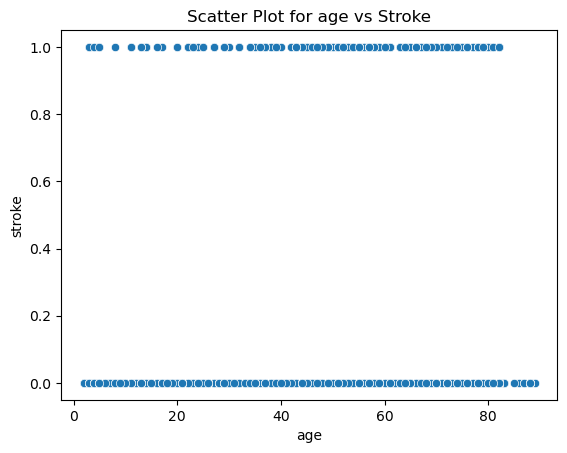

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot age vs Stroke
sns.scatterplot(x=numeric_columns[0], y='stroke', data=df_filled)
plt.title('Scatter Plot for age vs Stroke')
plt.show()




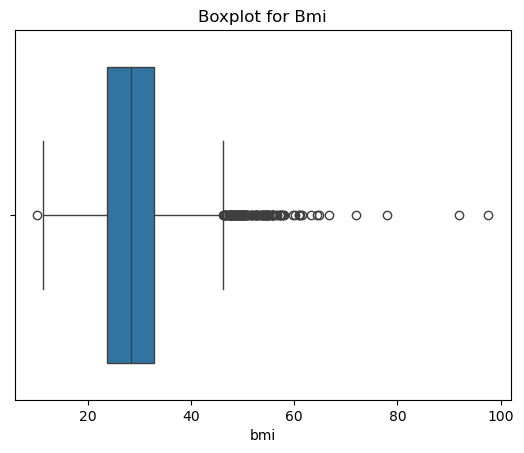

In [101]:
# Boxplot for the second numeric column (bmi)
sns.boxplot(x=numeric_columns[1], data=df_filled)
plt.title('Boxplot for Bmi')
plt.show()


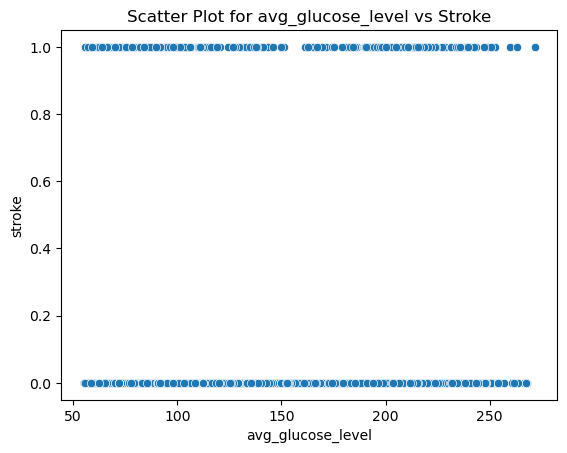

In [37]:
# Scatter Plot for the third numeric column vs Stroke
sns.scatterplot(x=numeric_columns[2], y='stroke', data=df)
plt.title(f'Scatter Plot for {numeric_columns[2]} vs Stroke')
plt.show()


### Grouping

In [105]:
# Group by smoking_status and calculate the sum of stroke cases for each category
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].sum().reset_index()
print(stroke_by_smoking_status)


    smoking_status  stroke
0          Unknown      29
1  formerly smoked      28
2     never smoked      36
3           smokes     267


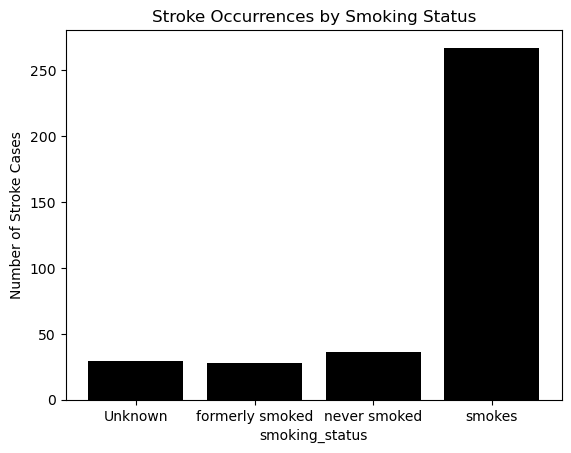

In [41]:
import matplotlib.pyplot as plt
plt.bar(stroke_by_smoking_status['smoking_status'], stroke_by_smoking_status['stroke'], color='black')
plt.xlabel('smoking_status')
plt.ylabel('Number of Stroke Cases')
plt.title('Stroke Occurrences by Smoking Status')
plt.show()


In [43]:
# Group by heart disease and stroke to count the number of people in each category
heart_disease_stroke_count = df.groupby(['heart_disease', 'stroke']).size().reset_index(name='count')
print(heart_disease_stroke_count)


   heart_disease  stroke  count
0              0       0   4528
1              0       1    306
2              1       0    222
3              1       1     54


In [109]:
# Group by Alcohol Consumption Frequency and calculate the number of people who had a stroke
stroke_by_alcohol_consumption = df.groupby('Alcohol Consumption Frequency')['stroke'].sum().reset_index()
print(stroke_by_alcohol_consumption)


  Alcohol Consumption Frequency  stroke
0                         Daily     110
1                    Frequently      58
2                         Never      88
3                  Occasionally      46
4                        Rarely      58


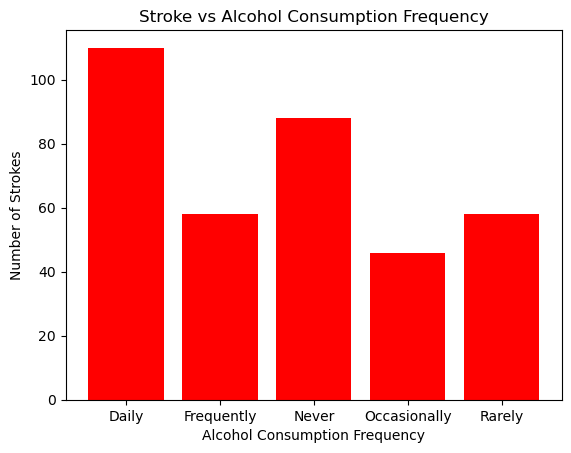

In [47]:
# Create a bar chart for Stroke vs Alcohol Consumption Frequency
plt.bar(stroke_by_alcohol_consumption['Alcohol Consumption Frequency'], stroke_by_alcohol_consumption['stroke'], color='red')
plt.xlabel('Alcohol Consumption Frequency')
plt.ylabel('Number of Strokes')
plt.title('Stroke vs Alcohol Consumption Frequency')
plt.show()


In [113]:
# Group by gender and hypertension to count the number of strokes
stroke_by_gender_hypertension = df.groupby(['gender'])['stroke'].sum().reset_index()
print(stroke_by_gender_hypertension)


   gender  stroke
0  Female     216
1    Male     144
2   Other       0


### The Average glucose levels for individuals with and without strokes?

In [71]:
avg_glucose_stroke = df.groupby('stroke')['avg_glucose_level'].mean()
print("Average Glucose Levels by Stroke Status:")
print(avg_glucose_stroke)


3. Average Glucose Levels by Stroke Status:
stroke
0    104.566899
1    127.005167
Name: avg_glucose_level, dtype: float64


### what is the Average BMI by stroke status?

In [86]:
avg_bmi_stroke = df.groupby('stroke')['bmi'].mean()
print("\nAverage BMI by Stroke Status:")
print(avg_bmi_stroke)



Average BMI by Stroke Status:
stroke
0    28.800632
1    30.230189
Name: bmi, dtype: float64


### Which work types are associated with higher stroke prevalence?

In [91]:
work_type_stroke = df.groupby('work_type')['stroke'].mean()
print("\nStroke Prevalence by Work Type:")
print(work_type_stroke)



Stroke Prevalence by Work Type:
work_type
Govt_job         0.070015
Never_worked     0.045455
Private          0.074530
Self-employed    0.102564
children         0.016012
Name: stroke, dtype: float64


###  What is the overall correlation between age, BMI, glucose level, and stroke occurrence?



In [95]:

correlation_matrix = df[['age', 'bmi', 'avg_glucose_level', 'stroke']].corr()
print("\nCorrelation Matrix for Age, BMI, Glucose Level, and Stroke:")
print(correlation_matrix)




Correlation Matrix for Age, BMI, Glucose Level, and Stroke:
                        age       bmi  avg_glucose_level    stroke
age                1.000000  0.333398           0.238171  0.215185
bmi                0.333398  1.000000           0.175502  0.044805
avg_glucose_level  0.238171  0.175502           1.000000  0.126814
stroke             0.215185  0.044805           0.126814  1.000000


### Role of dietary habits in stroke occurrences


In [118]:
dietary_stroke_impact = {
    "High Salt": df.groupby('High Salt')['stroke'].mean(),
    "High Fat": df.groupby('High Fat')['stroke'].mean(),
    "High Sugar": df.groupby('High Sugar')['stroke'].mean()
}

dietary_stroke_df = pd.DataFrame(dietary_stroke_impact)
print("Stroke by Eating Habits:")
print(dietary_stroke_df)


Stroke by eating Habits:
habit:
High Salt
No     0.072266
Yes    0.068627
Name: stroke, dtype: float64
habit:
High Fat
No     0.070845
Yes    0.070051
Name: stroke, dtype: float64
habit:
High Sugar
No     0.076627
Yes    0.064067
Name: stroke, dtype: float64
